In [1]:
#autoreload
%load_ext autoreload
%autoreload 2

In [2]:
import ComputationalHypergraphDiscovery as CHD

In [3]:
import jax.numpy as np
from jax import random

# Example 1

$$\begin{matrix}x_1=w_1\\x_2=w_2 \end{matrix} $$

In [4]:
key = random.PRNGKey(0)
key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))

X=np.concatenate([W[:,:2],W],axis=1)
node_names=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$']    

In [5]:
graph_discovery=CHD.GraphDiscovery(X,node_names)#,kernels=[CHD.Modes.LinearMode()])

Finding ancestors with kernel [gaussian]: 100%|██████████| 4/4 [00:04<00:00,  1.20s/it]



Results for $x_1$
Kernel [linear] has n/(n+s)=0.5009466479587518, Z=(1.00, 1.00), gamma=2.01e+03
Kernel [quadratic] has n/(n+s)=0.526412605667539, Z=(0.99, 1.00), gamma=2.22e+03
Kernel [gaussian] has n/(n+s)=0.004231243905589504, Z=(0.85, 0.87), gamma=5.92e-02
$x_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


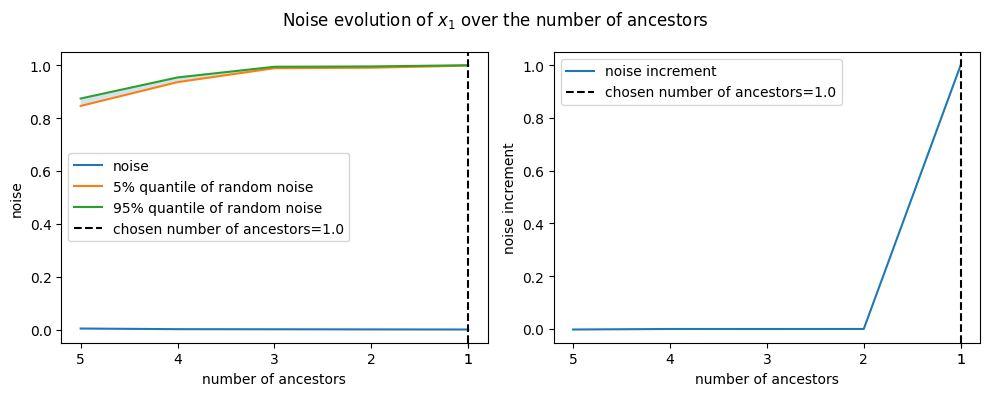

Ancestors of $x_1$: ['$w_1$']


Results for $x_2$
Kernel [linear] has n/(n+s)=0.49836724084627243, Z=(1.00, 1.00), gamma=1.99e+03
Kernel [quadratic] has n/(n+s)=0.5210977786212316, Z=(0.99, 1.00), gamma=2.18e+03
Kernel [gaussian] has n/(n+s)=0.003991898127685129, Z=(0.84, 0.87), gamma=6.10e-02
$x_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


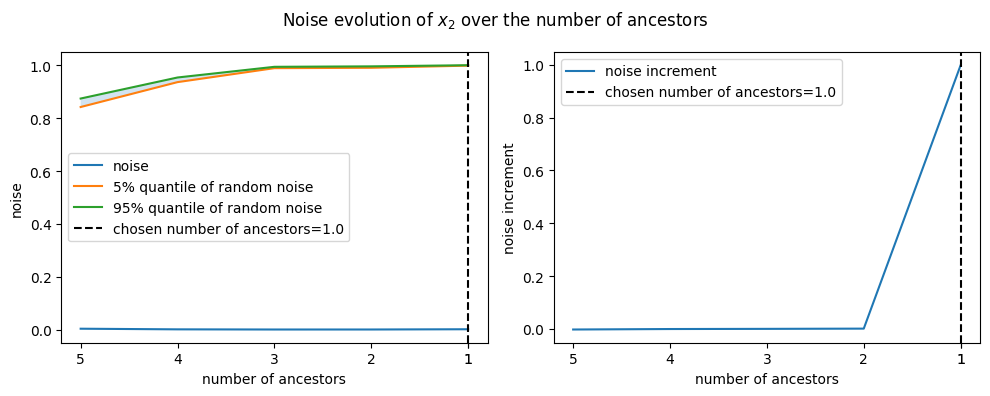

Ancestors of $x_2$: ['$w_2$']


Results for $w_1$
Kernel [linear] has n/(n+s)=0.5009466479587518, Z=(1.00, 1.00), gamma=2.01e+03
Kernel [quadratic] has n/(n+s)=0.526412605667539, Z=(0.99, 1.00), gamma=2.22e+03
Kernel [gaussian] has n/(n+s)=0.004231243905589504, Z=(0.84, 0.88), gamma=5.92e-02
$w_1$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


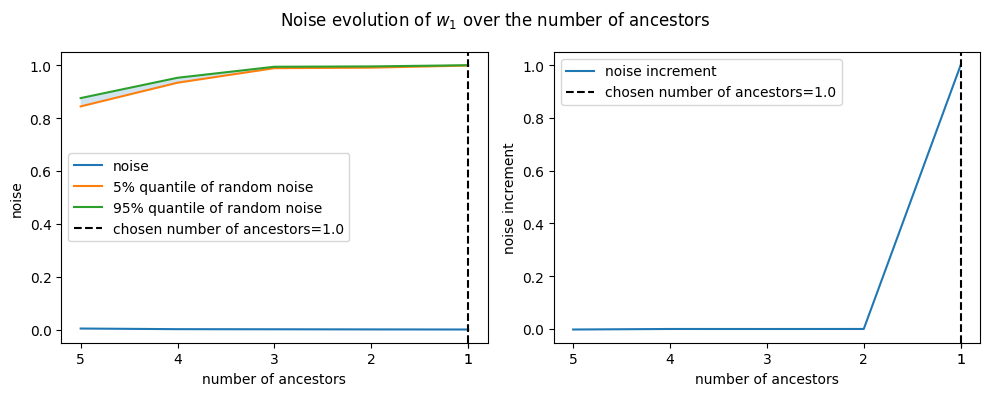

Ancestors of $w_1$: ['$x_1$']


Results for $w_2$
Kernel [linear] has n/(n+s)=0.4983672408462725, Z=(1.00, 1.00), gamma=1.99e+03
Kernel [quadratic] has n/(n+s)=0.5210977786212321, Z=(0.99, 1.00), gamma=2.18e+03
Kernel [gaussian] has n/(n+s)=0.0039918981276844965, Z=(0.84, 0.87), gamma=6.10e-02
$w_2$ has ancestors with the kernel [gaussian] | (n/(s+n)=0.00 after pruning)


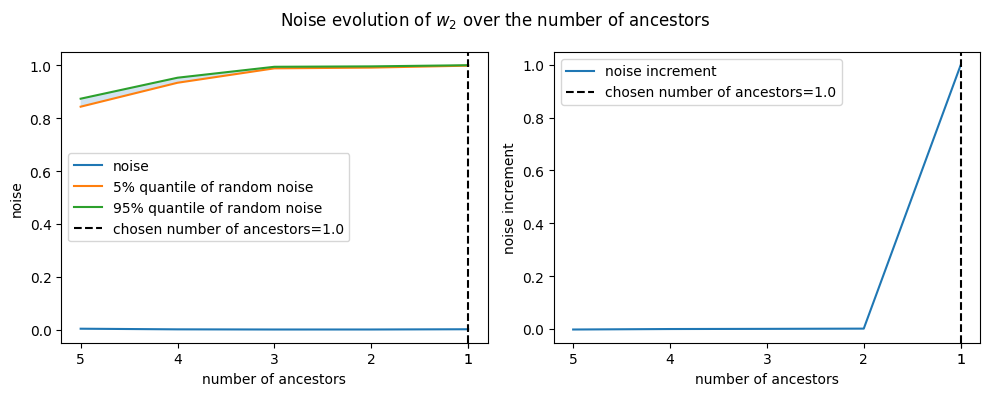

Ancestors of $w_2$: ['$x_2$']


Results for $w_3$
Kernel [linear] has n/(n+s)=0.999213464914225, Z=(1.00, 1.00), gamma=2.14e+03
Kernel [quadratic] has n/(n+s)=0.9972596827602123, Z=(1.00, 1.00), gamma=2.95e+03
Kernel [gaussian] has n/(n+s)=0.9316193565035628, Z=(0.93, 0.95), gamma=7.25e-04
$w_3$ has no ancestors


Results for $w_4$
Kernel [linear] has n/(n+s)=0.998959075059817, Z=(1.00, 1.00), gamma=2.52e+03
Kernel [quadratic] has n/(n+s)=0.9975260432297515, Z=(1.00, 1.00), gamma=3.22e+03
Kernel [gaussian] has n/(n+s)=0.9366263130746842, Z=(0.92, 0.94), gamma=7.83e-04
$w_4$ has no ancestors



In [6]:
graph_discovery.fit()

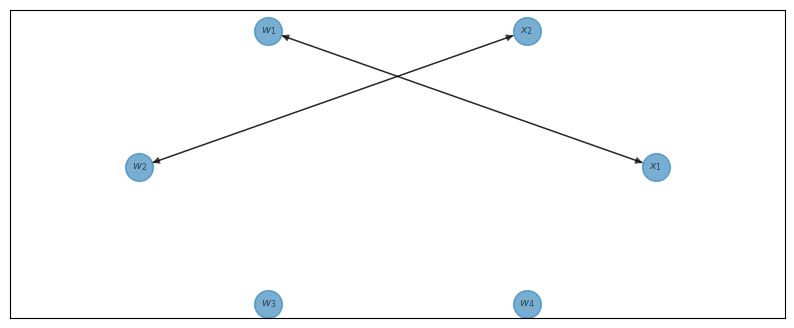

In [7]:
graph_discovery.plot_graph(type_label=False)

In [8]:
import joblib
joblib.dump(graph_discovery, "example1.pkl")

PicklingError: Can't pickle <function perform_interpolatory_regression_and_find_gamma at 0x7efe8038b920>: it's not the same object as ComputationalHypergraphDiscovery.interpolatory.perform_interpolatory_regression_and_find_gamma

# Example 2

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^2+1+0.1w_2\\x_3&=&w_3 \end{matrix} $$

In [ ]:

key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))
X1=W[:,0]
X2=X1**2+1+0.1*W[:,1]
X3=W[:,2]
X=np.concatenate([np.stack([X1,X2,X3],axis=1),W],axis=1)
node_names=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']

In [ ]:
graph_discovery=CHD.GraphDiscovery(X,node_names)

In [ ]:
graph_discovery.fit()

In [ ]:
graph_discovery.plot_graph(type_label=False)

In [ ]:
joblib.dump(graph_discovery, "example2.pkl")

# Example 3

$$\begin{matrix}x_1&=&w_1w_2\\x_2&=&w_2\sin(w_4)\end{matrix} $$

In [ ]:
key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))
X1=W[:,0]*W[:,1]
X2=W[:,1]*np.sin(W[:,3])
X=np.concatenate([np.stack([X1,X2],axis=1),W],axis=1)
node_names=['$x_1$','$x_2$','$w_1$','$w_2$','$w_3$','$w_4$'] 
  

In [ ]:
graph_discovery=CHD.GraphDiscovery(X,node_names)

In [ ]:
graph_discovery.fit()

In [ ]:
graph_discovery.plot_graph(type_label=False)

In [ ]:
joblib.dump(graph_discovery, "example3.pkl")

# Example 4

$$\begin{matrix}x_1&=&w_1\\x_2&=&x_1^3+1+0.1w_2\\x_3&=&(x_1+2)^3+0.1w_3\end{matrix} $$

In [ ]:
key, subkey = random.split(key)

W = random.normal(subkey, (1000, 4))
X1=W[:,0]
X2=X1**3+1+0.1*W[:,1]
X3=(X1+2)**3+0.1*W[:,2]
X=np.concatenate([np.stack([X1,X2,X3],axis=1),W],axis=1)
node_names=['$x_1$','$x_2$','$x_3$','$w_1$','$w_2$','$w_3$','$w_4$']  

In [ ]:
graph_discovery=CHD.GraphDiscovery(X,node_names)

In [ ]:
graph_discovery.fit()

In [ ]:
graph_discovery.plot_graph(type_label=False)

In [ ]:
joblib.dump(graph_discovery, "example4.pkl")